In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [27]:
# นำเข้าข้อมูลจากไฟล์ชื่อ Data Change.csv 
url = 'https://raw.githubusercontent.com/nawinpoyen7/MachineLearning/main/Data%20Change.csv'
df=pd.read_csv(url)
df.sample(20) 

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
6915,464716,Male,1,43,1,Marketing,0,2,6,Cat_4,D
3375,467621,Male,1,76,1,Lawyer,1,0,1,Cat_6,A
1899,463025,Male,1,40,0,Executive,7,0,4,Cat_6,A
3775,464669,Female,1,42,0,Engineer,0,0,4,Cat_4,D
4326,466737,Male,0,33,0,Entertainment,1,0,13,Cat_6,D
7192,467631,Male,1,72,1,Lawyer,3,2,2,Cat_6,C
6252,461545,Female,1,70,1,Artist,1,0,3,Cat_7,B
2592,462768,Male,1,46,1,Artist,0,1,3,Cat_6,B
210,466236,Female,1,69,1,Engineer,0,0,2,Cat_4,B
4536,467954,Male,0,31,0,Healthcare,8,0,4,Cat_6,D


In [28]:
#ดูภาพรวมข้อมูล
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       8068 non-null int64
Age                8068 non-null int64
Graduated          8068 non-null int64
Profession         8068 non-null object
Work_Experience    8068 non-null int64
Spending_Score     8068 non-null int64
Family_Size        8068 non-null int64
Var_1              8068 non-null object
Segmentation       8068 non-null object
dtypes: int64(7), object(4)
memory usage: 693.4+ KB


In [29]:
# เเสดงหัวข้อในเเต่ละคอลัมน์ของฐานข้อมูล
df.columns

Index([u'ID', u'Gender', u'Ever_Married', u'Age', u'Graduated', u'Profession',
       u'Work_Experience', u'Spending_Score', u'Family_Size', u'Var_1',
       u'Segmentation'],
      dtype='object')

In [30]:
#บอกค่าที่หายไปในแต่ละcolumn
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<Figure size 720x360 with 0 Axes>

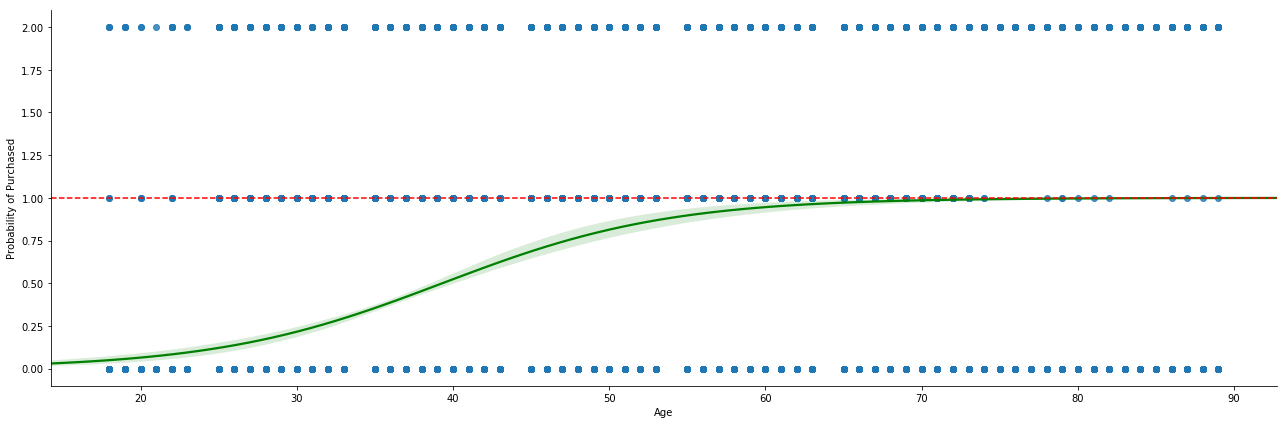

In [6]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='Age', y='Spending_Score', data=df,
           logistic=True, height=6, aspect=3, 
           line_kws={'color': 'green'})
plt.ylabel('Probability of Purchased')
plt.axhline(1, color='red', linestyle='--');

In [31]:
# เช็คประเภทข้อมุล
df.dtypes

ID                  int64
Gender             object
Ever_Married        int64
Age                 int64
Graduated           int64
Profession         object
Work_Experience     int64
Spending_Score      int64
Family_Size         int64
Var_1              object
Segmentation       object
dtype: object

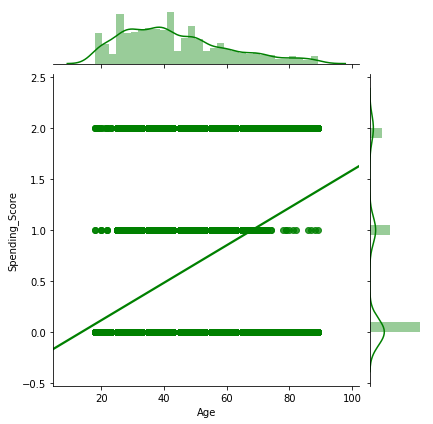

In [32]:
# โดยการใช้ seaborn ทำให้สามารถดูการกระจายตัวของข้อมูล (histogram) ในเเนวเเกน x เเละ y ได้ดังนี้
sns.jointplot(x='Age', y='Spending_Score', data=df, kind='reg', ci=None,
              color='green');

In [33]:
# สร้าง Logistic Regression model โดยใช้ library ของ scikit learn
# นำเข้าคลาสของ Logistic Regression จาก scikit learn โดย
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# เเบ่งข้อมูลออกเป็นชุดเรียนรู้เเละชุดทดสอบโดยกำหนดให้ชุดทดสอบมีขนาดเป็น 30% ของข้อมูล
# X=df[['Age']]
X=df[['Age']]
y=df['Spending_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
X_train

,Age
2011,39
3132,27
5653,21
3348,51
6890,66
3448,84
1384,31
1726,33
4528,52
5486,33


In [35]:
model = LogisticRegression() # สร้าง object ชื่อ model จาก class ของ LogisticRegression class 
model.fit(X_train, y_train)  # สร้าง model LogisticRegression จากข้อมูล X เเละ Y

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
# ทดลองเเสดงค่า intercept ( θ0 ) เเละ coefficient ( θ1 )

In [37]:
# intercept 
print('intercept = {model.intercept_}') 
# coefficient
print('coefficient = {model.coef_}') 

intercept = {model.intercept_}
coefficient = {model.coef_}


In [38]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
model.score(X_train, y_train) # accuracy of the model

0.6063396493713477

In [39]:
# model.score(X_test, y_test) # accuracy of the model

In [40]:
# K-fold cross validation

In [41]:
from sklearn.model_selection import KFold, cross_val_score
# from sklearn.model_selection import cross_val_score
from numpy import mean, std
# from numpy import std

In [42]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.606 (0.009)


In [43]:
scores 

array([0.59823009, 0.59911504, 0.62267493, 0.5996457 , 0.60938884])

In [44]:
# ทดลองการทำนายค่าโดยทำได้ดังนี้

In [45]:
predicted = model.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
5018,0,1
3081,0,1
5953,0,1
5033,0,1
24,0,1
1979,0,1
4576,2,0
491,2,0
4586,2,0
4248,0,2


In [47]:
len(dx[dx.y_true != dx.y_pred])

911

In [48]:
dx[dx.y_true == dx.y_pred]

,y_pred,y_true
5906,0,0
3252,0,0
2589,0,0
835,0,0
1076,0,0
4932,0,0
6734,2,2
4789,0,0
7809,0,0
5248,0,0


In [49]:
# วัดประสิทธิภาพด้วย Confusion matrix

In [50]:
from sklearn import metrics
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [51]:
print('accuracy = {metrics.accuracy_score(y_test, predicted)}')
print('precision = {metrics.precision_score(y_test, predicted)}')
print('recall = {metrics.recall_score(y_test, predicted)}')

accuracy = {metrics.accuracy_score(y_test, predicted)}
precision = {metrics.precision_score(y_test, predicted)}
recall = {metrics.recall_score(y_test, predicted)}


In [52]:
# Multiple Logistic Regression

In [53]:
df=pd.read_csv(url, usecols=list(range(2, 5)))
df.head()

,Ever_Married,Age,Graduated
0,0,22,0
1,1,38,1
2,1,67,1
3,1,67,1
4,1,40,1


In [54]:
# ทดลองดูความสัมพันธ์ระหว่างคุณลักษณะ

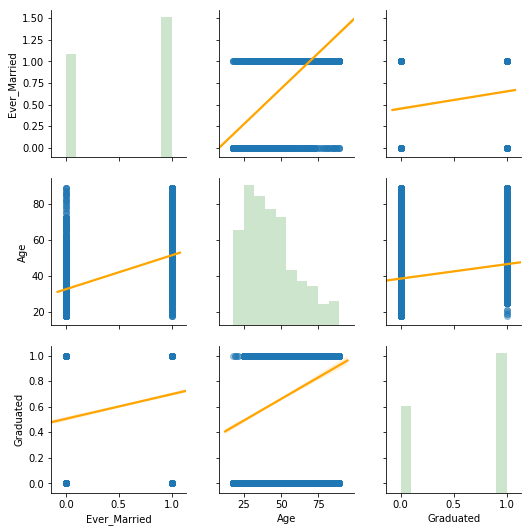

In [55]:
sns.pairplot(df,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [56]:
# สร้าง multiple logistic regression model
X = df.drop(columns=['Age'])
y = df['Age']
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [57]:
X

,Ever_Married,Graduated
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,0,1
7,0,1
8,1,1
9,1,1


In [58]:
mplo = LogisticRegression() 
mplo.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
# intercept 
print('intercept = {mplo.intercept_}') # theta0
# coefficient
print('coefficient = {mplo.coef_}') # theta1 theta2 theta3

intercept = {mplo.intercept_}
coefficient = {mplo.coef_}


In [60]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
R_squared_error_training = R_squred_train
print(R_squared_error_training)

0.051440966842268364


In [61]:
 R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
 print(R_squred_train) 
 R_squred = mplo.score(X_test, y_test) 
 print(R_squred) 

0.051440966842268364
0.04956629491945477


In [62]:
# Cross valiation

In [63]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.044 (0.004)


In [64]:
# ทดลองทำนายผลลัพธ์
predicted = mplo.predict(X_test)
predicted 

array([50, 47, 50, ..., 50, 50, 50], dtype=int64)

In [65]:
predicted = mplo.predict(X_test)
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
dx[dx.y_true != dx.y_pred]

,y_pred,y_true
6558,50,25
7024,50,35
3538,50,42
6523,50,60
6231,50,43
83,47,35
1860,22,29
4263,50,35
5159,22,28
7740,33,26


In [66]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predicted).ravel()
print('true negative = {tn}')
print('false positive = {fp}')
print('false negative = {fn}')
print('true positive = {tp}')

ValueError: too many values to unpack

In [67]:
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)
precision = metrics.precision_score(y_test, predicted)
print(precision)
recall = metrics.recall_score(y_test, predicted)
print(recall)

0.04956629491945477


ValueError: Target is multiclass but average='binary'. Please choose another average setting.